In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from utils import extract_first_entries, generate_pixel_columns

file = './dataset/lantern.ndjson'
df = extract_first_entries(file, recognized=True)
print('Done loading')
df = generate_pixel_columns(df, 32, 1, True)
print('Done generating pixel columns')
x = df.filter(regex=('pixel.+'))
y = df['countrycode']


Done loading
Done generating pixel columns


Reducer PCA


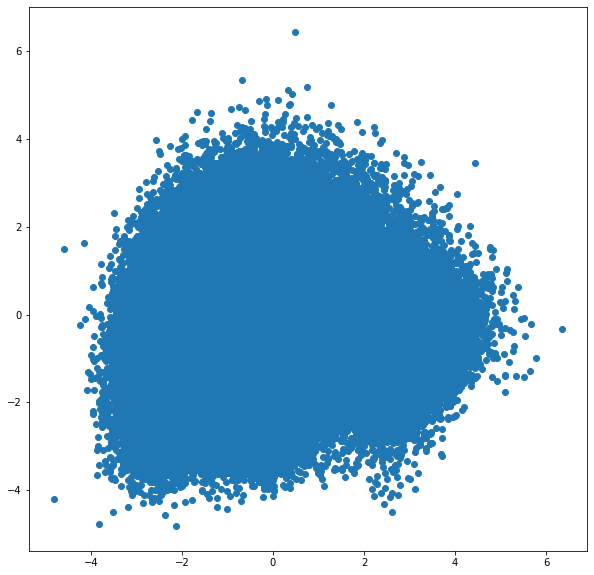

Reducer FastICA


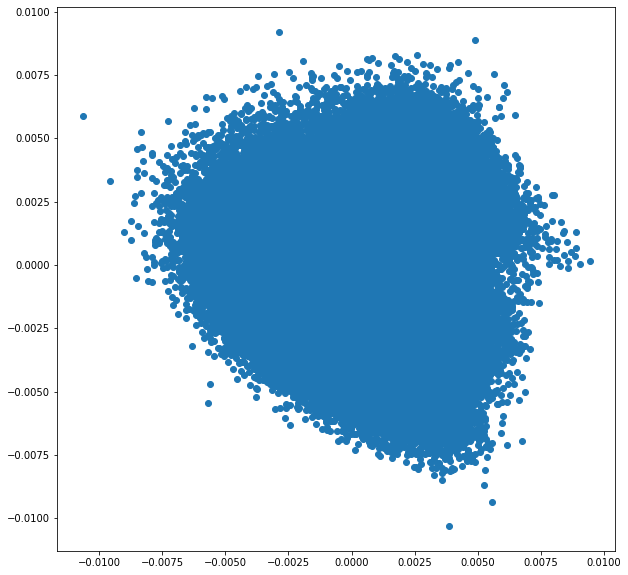

Reducer LinearDiscriminantAnalysis


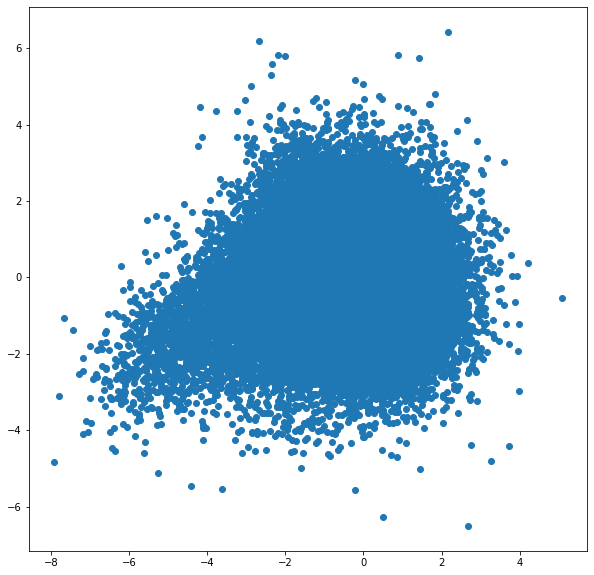

Reducer SparsePCA


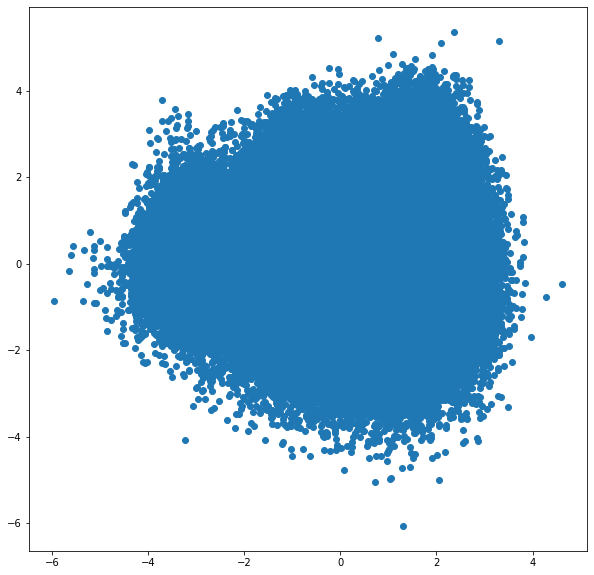

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import FastICA, SparsePCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

reducers = {
    'PCA': PCA(2),
    'FastICA' : FastICA(2),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(n_components = 2), #requires target
    "SparsePCA" : SparsePCA(2),
}

for typ, reducer in reducers.items():
    if(typ == "LinearDiscriminantAnalysis"):
        data = reducer.fit_transform(x, y)
    else: 
        data = reducer.fit_transform(x)
    print(f"Reducer {typ}")

    plt.figure(figsize=(10,10))
    plt.scatter(data[:,0], data[:,1])
    plt.show()
    
#     Show inliers only
#     outlier_det = IsolationForest(random_state=42)
#     outliers = outlier_det.fit_predict(data)
#     df_inliers = pd.DataFrame(data)

#     df_inliers['outlier'] = np.array(map(lambda n: 1 if n < 0 else 0, outliers))
#     df_inliers['drawing'] = df['drawing']
#     df_inliers['countrycode'] = y
#     df_inliers = df_inliers[df_inliers['outlier'] == 0]
    
#     print(f"{typ} - After removing outliers")
#     plt.figure(figsize=(10,10))
#     plt.scatter(df_inliers[0], df_inliers[1])
#     plt.show()